In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
#import labels from labels.txt
labels = open('labels.txt').read().strip().split("\n")

In [3]:
labels

['lysol', 'zucaritas', 'cocacola', 'pringles', 'principe', 'destop']

In [5]:
model = tf.saved_model.load('saved_model')

2023-04-20 08:31:37.261796: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'resample_p7/PartitionedCall' has 1 outputs but the _output_shapes attribute specifies shapes for 3 outputs. Output shapes may be inaccurate.


In [14]:
import os
import random

image_0679.png
(540, 960, 3)


2023-04-20 08:47:04.727798: E tensorflow/stream_executor/cuda/cuda_dnn.cc:373] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-04-20 08:47:04.727864: E tensorflow/stream_executor/cuda/cuda_dnn.cc:382] Possibly insufficient driver version: 525.105.17
2023-04-20 08:47:04.727903: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1130 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

2 root error(s) found.
  (0) UNIMPLEMENTED:  DNN library is not found.
	 [[{{node stem/conv2d/Conv2D}}]]
	 [[Func/StatefulPartitionedCall/loop_body_1/NonMaxSuppressionV5/pfor/while/body/_1229/input/_1944/_80]]
  (1) UNIMPLEMENTED:  DNN library is not found.
	 [[{{node stem/conv2d/Conv2D}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_restored_function_body_82889]

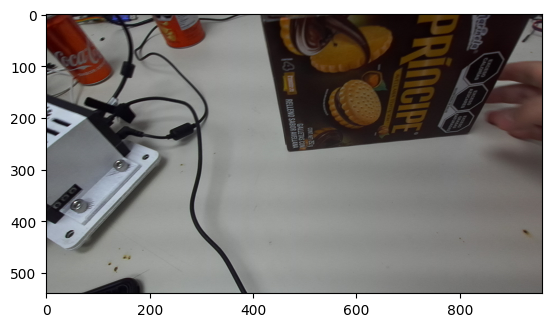

In [37]:
#get random image from recorded_images and predict
get_image = os.listdir('recorded_images')
rand = random.choice(get_image)
print(rand)
image = cv2.imread('./recorded_images/' + rand)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

#predict
pred = model([image])
pred = tf.nn.softmax(pred)
pred = np.argmax(pred)
print(labels[pred])